# WeatherPy
----



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from scipy.stats import linregress
from config import weather_api_key
from citipy import citipy

# CSV file
cities_data_file = "cities.csv"

#ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for lat_lngs and cities
lat_lngs = []
cities = []

# Random set combos
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

#City Data List
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")


record_count = 1
set_count = 1

# Cities Loop
for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

#API requests
    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | poso
Processing Record 3 of Set 1 | vzmorye
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | amderma
City not found. Skipping...
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | dandong
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | takoradi
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | vallenar
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | saskyla

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert Raw data to DataFrame
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

city_data_pd.to_csv(cities_data_file, index_label="City_ID")

city_data_pd.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,48.00,90,20,1.01,ZA,1601156192
1,poso,-1.40,120.75,76.26,80,86,4.97,ID,1601156354
2,vzmorye,54.70,20.24,68.00,68,99,11.18,RU,1601156354
3,cape town,-33.93,18.42,46.99,87,20,5.82,ZA,1601156162
4,cidreira,-30.18,-50.21,64.65,93,94,18.54,BR,1601156354


## Latitude vs. Temperature Plot

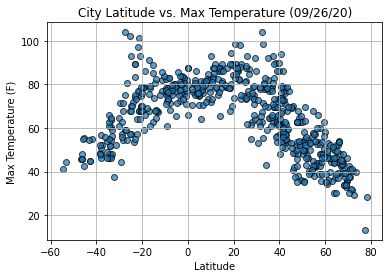

In [6]:
# Scatter Plot Lat vs. Temp
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig1.png")

plt.show()

## Latitude vs. Humidity Plot

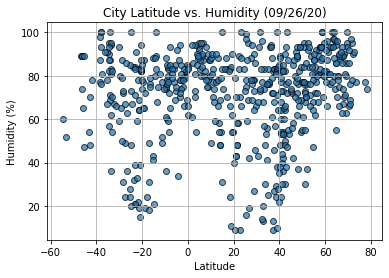

In [7]:
# Scatter Plot Lat vs. Humid
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig2.png")


plt.show()

## Latitude vs. Cloudiness Plot

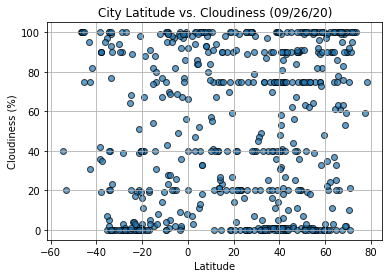

In [8]:
# Scatter plot Lat vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig3.png")


plt.show()

## Latitude vs. Wind Speed Plot

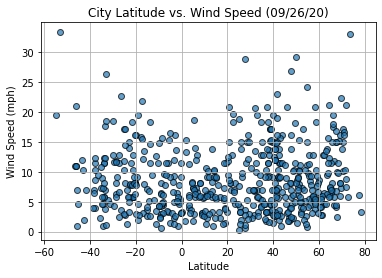

In [9]:
# Scatter plot for Lat vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig4.png")

plt.show()

## Linear Regression

In [10]:
# LinReg Plot function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # South Hemi LinReg
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=10,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f" r-squared is: {rvalue}")
    plt.show()

In [11]:
# North and South Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 r-squared is: -0.8112588517102738


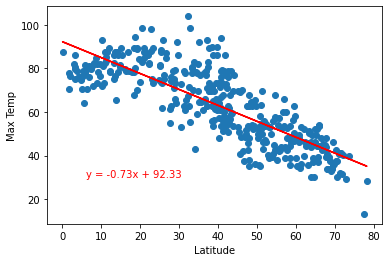

In [12]:
# North Hemisphere LinReg
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 r-squared is: 0.706499026242583


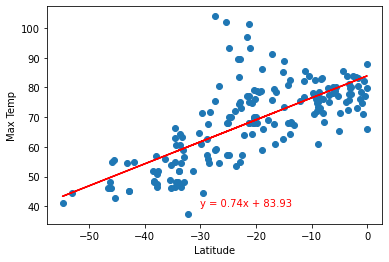

In [13]:
# South Hemisphere LinReg
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 r-squared is: 0.15224773515505227


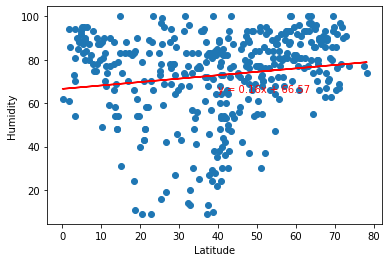

In [14]:
# North Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,65))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 r-squared is: 0.025104163324457543


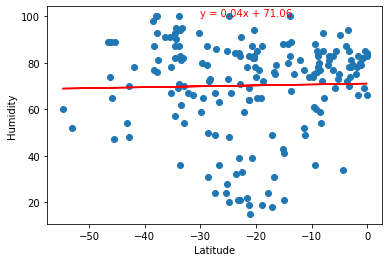

In [15]:
# South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,100))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 r-squared is: 0.06335701195324576


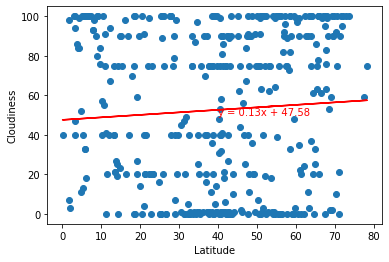

In [16]:
# North Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,50))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 r-squared is: 0.03210608784519268


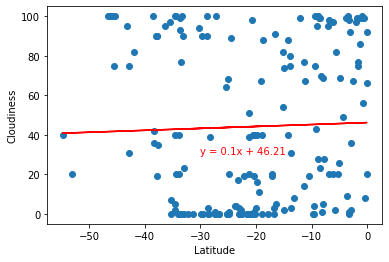

In [17]:
# South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 r-squared is: 0.1695859712132168


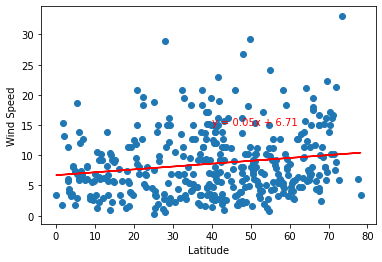

In [18]:
# North Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,15))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 r-squared is: -0.23319213422606053


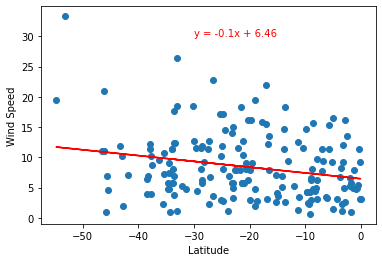

In [19]:
# South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))